In [1]:
import pandas as pd
from ast import literal_eval
import random
import numpy as np

df_orders = pd.read_json('synth_output_data/orders.json')
df_products = pd.read_json('synth_output_data/products.json')
df_partners = pd.read_json('synth_output_data/partners.json')
df_users = pd.read_json('synth_output_data/users.json')
df_support_requests= pd.read_json('synth_output_data/support_requests.json')
df_orders_random = pd.read_json('synth_output_data/orders_random.json')
df_support_requests_random = pd.read_json('synth_output_data/support_requests_random.json')

df_orders_users = pd.merge(df_orders, df_users, on="user_id", how="left")
df_orders_users_cut = df_orders_users.loc[df_orders_users['created_date']<df_orders_users['timestamp']]
df_orders_random_users = pd.merge(df_orders_random, df_users, on="user_id", how="left")

df_orders_concat = pd.concat([df_orders_users_cut, df_orders_random_users], axis=0)
df_orders_concat = df_orders_concat.drop(['order_id'], axis=1)
df_orders_concat = df_orders_concat.reset_index(drop=True)
df_orders_concat = df_orders_concat.reset_index()
df_orders_concat = df_orders_concat.rename({'index': 'order_id'}, axis=1)
df_orders_concat['order_id'] = df_orders_concat['order_id']+1

df_orders_concat_cut = df_orders_concat.loc[df_orders_concat['created_date']<df_orders_concat['timestamp']]
df_orders_concat_cut = df_orders_concat_cut.loc[df_orders_concat_cut['timestamp']<'2022-06-01']
df_orders_concat_cut = df_orders_concat_cut.sort_values('timestamp')
df_orders_concat_cut = df_orders_concat_cut.drop('order_id', axis=1)
df_orders_concat_cut = df_orders_concat_cut.reset_index(drop=True)
df_orders_concat_cut = df_orders_concat_cut.reset_index()
df_orders_concat_cut = df_orders_concat_cut.rename({'index': 'order_id'}, axis=1)
df_orders_concat_cut['order_id'] = df_orders_concat_cut['order_id']+1

In [2]:
df_orders_concat_cut.sample(5)

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
39,40,USD,[29],3,instagram,2022-01-23 19:10:16,18,edge,2022-01-03 18:59:06,ed_quas@gmail.com,"{'city': 'Gia land', 'country': 'MR', 'street_..."
999,1000,USD,"[3, 13, 6, 26]",4,organic,2022-05-31 19:37:13,217,safari,2022-02-04 15:27:04,constantin_ratione@gmail.com,"{'city': 'Abelardo haven', 'country': 'TK', 's..."
433,434,USD,"[37, 35, 31]",3,instagram,2022-05-01 14:05:27,763,safari,2022-04-24 20:17:37,mathilde97@hotmail.com,"{'city': 'Kreiger side', 'country': 'GE', 'str..."
333,334,USD,[15],3,ppc,2022-04-26 12:47:55,25,edge,2022-01-05 02:27:25,valentina_sit@yahoo.com,"{'city': 'McLaughlin mouth', 'country': 'FM', ..."
425,426,USD,"[36, 14]",4,instagram,2022-05-01 10:29:24,352,chrome,2022-02-24 21:23:08,macey_omnis@hotmail.com,"{'city': 'Jacobi haven', 'country': 'IT', 'str..."


<AxesSubplot:>

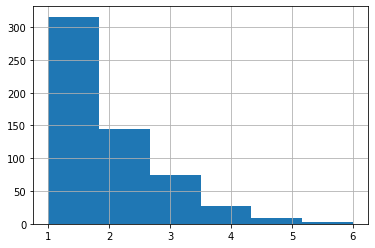

In [3]:
df_orders_concat_cut['user_id'].value_counts().hist(bins=6)

<AxesSubplot:>

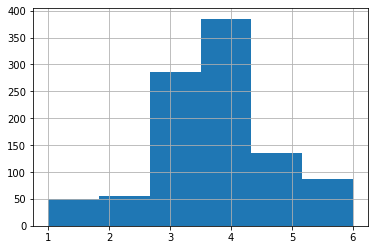

In [4]:
df_orders_concat_cut['partner_id'].hist(bins=6)

In [5]:
df_orders_concat_cut['referrer'].value_counts()

instagram    308
ppc          248
facebook     214
organic      123
direct        76
twitter       31
Name: referrer, dtype: int64

In [6]:
df_orders_concat_cut['ordered_product_skus']

0                      [5, 27]
1                      [31, 9]
2              [28, 32, 7, 40]
3              [33, 15, 37, 3]
4                         [17]
                ...           
995     [39, 25, 3, 33, 5, 20]
996               [27, 20, 19]
997    [30, 1, 14, 20, 24, 26]
998        [2, 11, 40, 33, 17]
999             [3, 13, 6, 26]
Name: ordered_product_skus, Length: 1000, dtype: object

In [7]:
def product_manipulation(x):
    if i in x:
        if random.randint(0, 10) > 2:
            if len(x) > 1:
                x.remove(i)
    return x

for i in range(1, 43):
    if random.randint(0, 10) > 3:
        print(f'unpopular product: {i}')
        df_orders_concat_cut['ordered_product_skus'] = df_orders_concat_cut['ordered_product_skus'].apply(lambda x: product_manipulation(x))

unpopular product: 1
unpopular product: 3
unpopular product: 4
unpopular product: 5
unpopular product: 8
unpopular product: 9
unpopular product: 10
unpopular product: 11
unpopular product: 14
unpopular product: 15
unpopular product: 16
unpopular product: 22
unpopular product: 23
unpopular product: 24
unpopular product: 25
unpopular product: 31
unpopular product: 32
unpopular product: 37
unpopular product: 39
unpopular product: 40
unpopular product: 41
unpopular product: 42


In [8]:
df_orders_concat_cut

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
0,1,USD,"[5, 27]",3,ppc,2022-01-03 08:23:34,10,safari,2022-01-02 23:18:24,shannon_consequuntur@yahoo.com,"{'city': 'Klein port', 'country': 'NO', 'stree..."
1,2,USD,[9],1,facebook,2022-01-05 08:22:10,13,safari,2022-01-03 08:13:21,casper_corporis@hotmail.com,"{'city': 'Rhea haven', 'country': 'PT', 'stree..."
2,3,USD,"[28, 7]",4,ppc,2022-01-09 22:17:32,24,chrome,2022-01-04 21:10:59,thaddeus_eius@hotmail.com,"{'city': 'Vandervort bury', 'country': 'JO', '..."
3,4,USD,"[33, 37]",3,instagram,2022-01-09 23:32:02,25,edge,2022-01-05 02:27:25,valentina_sit@yahoo.com,"{'city': 'McLaughlin mouth', 'country': 'FM', ..."
4,5,USD,[17],4,ppc,2022-01-10 10:52:09,18,edge,2022-01-03 18:59:06,ed_quas@gmail.com,"{'city': 'Gia land', 'country': 'MR', 'street_..."
...,...,...,...,...,...,...,...,...,...,...,...
995,996,USD,"[25, 3, 33, 20]",6,facebook,2022-05-30 09:52:13,100,edge,2022-01-15 13:28:58,hector_magni@yahoo.com,"{'city': 'Cassin haven', 'country': 'MY', 'str..."
996,997,USD,"[27, 20, 19]",3,instagram,2022-05-30 17:17:13,333,internet_explorer,2022-02-21 14:42:22,deondre_libero@hotmail.com,"{'city': 'Regan chester', 'country': 'MQ', 'st..."
997,998,USD,"[30, 20, 24, 26]",3,facebook,2022-05-31 08:00:34,979,safari,2022-05-27 19:48:10,javon_quia@yahoo.com,"{'city': 'Bayer haven', 'country': 'BI', 'stre..."
998,999,USD,"[2, 33, 17]",4,facebook,2022-05-31 14:30:22,583,netscape,2022-03-29 07:18:34,reagan_corporis@gmail.com,"{'city': 'Bednar mouth', 'country': 'SG', 'str..."


In [9]:
df_orders_concat_cut['ordered_product_skus'].value_counts()

[13]                15
[17]                14
[39]                12
[37]                12
[20]                11
                    ..
[29, 21, 34]         1
[34, 37, 38, 34]     1
[28, 22]             1
[18, 20, 13]         1
[13, 6, 26]          1
Name: ordered_product_skus, Length: 675, dtype: int64

In [10]:
to_drop = [
    'browser',
    'created_date',
    'email',
    'shipping_address',
]
df_orders_concat_cut.drop(to_drop, inplace=True, axis=1)

In [11]:
df_orders_concat_cut.to_csv('transformed_data/orders.csv', index=False)

In [12]:
df_baskets = df_orders_concat_cut.explode('ordered_product_skus')[['order_id', 'ordered_product_skus']]
df_baskets.reset_index(inplace=True, drop=True)
df_baskets.reset_index(inplace=True)
df_baskets = df_baskets.rename({'index': 'basket_item_id'}, axis=1)
df_baskets['basket_item_id']+=1

In [13]:
df_baskets.to_csv('transformed_data/baskets.csv', index=False)

<AxesSubplot:>

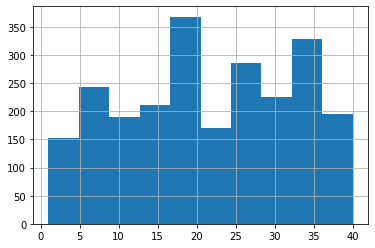

In [14]:
df_baskets['ordered_product_skus'].hist()

In [15]:
df_baskets

,basket_item_id,order_id,ordered_product_skus
0,1,1,5
1,2,1,27
2,3,2,9
3,4,3,28
4,5,3,7
...,...,...,...
2365,2366,999,33
2366,2367,999,17
2367,2368,1000,13
2368,2369,1000,6


In [16]:
df_baskets[['order_id', 'ordered_product_skus']].groupby('order_id').agg('count')

,ordered_product_skus
order_id,
1,2
2,1
3,2
4,2
5,1
...,...
996,4
997,3
998,4


In [17]:
df_products.sample(10)

,price_amount,price_currency,product_name,sku
30,25,USD,Spider plant,31
32,20,USD,Olive tree,33
19,17,USD,Bamboo,20
1,250,USD,Wood-fired pizza oven,2
18,3,USD,Thyme seeds,19
26,65,USD,Ficus,27
40,34,USD,Calathea,41
28,30,USD,Alocasia,29
14,80,USD,Fire Pit Medium,15
37,25,USD,Money plant,38


In [18]:
df_products.to_csv('transformed_data/products.csv', index=False)

In [19]:
df_partners

,partner_commission,partner_id,partner_name
0,0.18,1,Plant Paradise
1,0.14,2,Garden of Sweden
2,0.06,3,"Peat, Fruits and Leaves"
3,0.22,4,Redwood Ranch
4,0.08,5,Trowels R Us
5,0.14,6,Glorious Gardens


In [20]:
df_partners.to_csv('transformed_data/partners.csv', index=False)

In [21]:
df_users.sample(10)

,browser,created_date,email,shipping_address,user_id
177,edge,2022-01-29 02:19:11,dennis_ea@gmail.com,"{'city': 'Kaci ton', 'country': 'SO', 'street_...",178
983,safari,2022-05-28 15:43:34,eulalia_sunt@gmail.com,"{'city': 'Lake Blake Mohr haven', 'country': '...",984
805,safari,2022-05-01 16:30:34,samara_omnis@hotmail.com,"{'city': 'Lucie furt', 'country': 'GM', 'stree...",806
539,chrome,2022-03-21 22:50:52,adeline_culpa@hotmail.com,"{'city': 'New Brandyn Ferry town', 'country': ...",540
307,firefox,2022-02-18 03:27:39,brycen_et@hotmail.com,"{'city': 'Beer fort', 'country': 'SX', 'street...",308
561,firefox,2022-03-24 22:42:00,rahul_ad@yahoo.com,"{'city': 'Layne ville', 'country': 'BA', 'stre...",562
161,edge,2022-01-26 13:23:17,newell_illo@hotmail.com,"{'city': 'Paxton chester', 'country': 'KP', 's...",162
3,safari,2022-01-01 23:39:30,bill_rem@yahoo.com,"{'city': 'Shane fort', 'country': 'KN', 'stree...",4
767,safari,2022-04-25 20:28:04,jacques_excepturi@hotmail.com,"{'city': 'Bauch borough', 'country': 'CY', 'st...",768
854,edge,2022-05-09 07:08:39,giovanna_eligendi@gmail.com,"{'city': 'Gislason town', 'country': 'PE', 'st...",855


In [22]:
df_users['browser'].value_counts()

chrome               501
safari               243
edge                 179
firefox               41
internet_explorer     20
netscape              14
lynx                   2
Name: browser, dtype: int64

In [23]:
df_users.to_csv('transformed_data/users.csv', index=False)

In [24]:
df_orders_support_requests = pd.merge(df_support_requests, df_orders_concat_cut, how='left', on='order_id')
df_orders_support_requests = df_orders_support_requests.loc[df_orders_support_requests['timestamp_x']>df_orders_support_requests['timestamp_y']]
df_orders_support_requests.rename({'timestamp_x': 'timestamp'}, axis=1, inplace=True)

to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id'
]

df_orders_support_requests.drop(to_drop, inplace=True, axis=1)
df_orders_support_requests_concat = pd.concat([df_orders_support_requests, df_support_requests_random])

df_orders_support_requests_concat_merge = pd.merge(df_orders_support_requests_concat, df_orders_concat_cut, how='left', on='order_id')
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge.loc[df_orders_support_requests_concat_merge['timestamp_x']>df_orders_support_requests_concat_merge['timestamp_y']]
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge_cut.rename({'timestamp_x': 'timestamp'}, axis=1)

to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id'
]

df_orders_support_requests_concat_merge_cut.drop(to_drop, inplace=True, axis=1)

<AxesSubplot:>

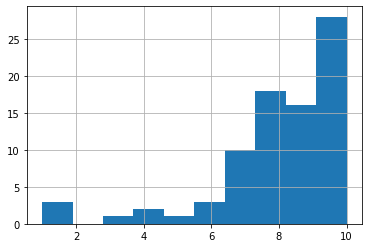

In [25]:
df_orders_support_requests_concat_merge_cut['feedback_rating'].hist()

In [26]:
df_orders_support_requests_concat_merge_cut['reason'].value_counts()

Delivery issue           37
Product related query    25
Wrong item received      11
Payment issue             9
Name: reason, dtype: int64

In [27]:
df_orders_support_requests_concat_merge_cut['order_id'].value_counts()

31     2
7      2
95     2
79     2
50     1
      ..
702    1
552    1
110    1
342    1
178    1
Name: order_id, Length: 78, dtype: int64

In [28]:
df_orders_support_requests_concat_merge_cut.to_csv('transformed_data/support_requests.csv', index=False)